In [2]:
import cv2
from skimage import io as skio
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2hsv
import numpy as np
import platform
import tempfile
import os
# necessite scikit-image 

(400, 600, 3)
[[158. 158. 158. ...  99.  99.  99.]
 [158. 158. 158. ...  99.  99.  99.]
 [158. 158. 158. ...  99.  99.  99.]
 ...
 [ 56.  56.  56. ...  57.  57.  57.]
 [ 56.  56.  56. ...  57.  57.  57.]
 [ 56.  56.  56. ...  57.  57.  57.]]


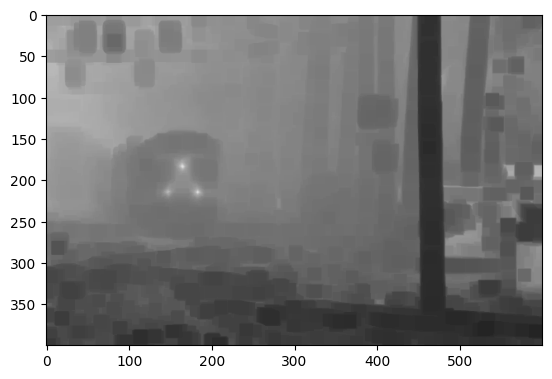

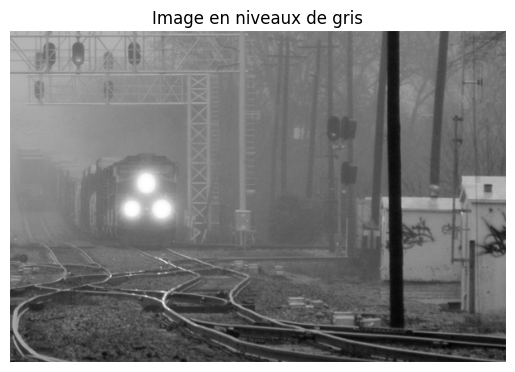

In [3]:
def dark_channel(im, patch):
    """ 
    im : array de l'image
    patch : hauteur du patch
    """
    print(np.shape(im))
    M,N,a = np.shape(im)

    if patch%2 == 0:
        raise ValueError("Should be an odd number to center x")
    
    darkchannel = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            up = i-int( (patch-1) /2)
            down = i + int( (patch-1) /2)
            left = j-int( (patch-1) /2)
            right = j + int( (patch-1) /2)
            value = im[max(up,0):min(down+1,M), max(left,0):min(right+1,N),:]
            darkchannel[i,j] = np.min(value)
    return darkchannel

im = skio.imread("haze_image/train.png")
test = dark_channel(im,15)
print(test)
plt.imshow(test,cmap ="gray", vmin = 0, vmax = 255)
plt.show()



# Charger l'image RVB (3 canaux de couleur) avec OpenCV
# Remplacez 'votre_image.jpg' par le chemin de votre image

# Convertir l'image RVB en niveaux de gris en utilisant une moyenne pondérée
image_gray = np.mean(im, axis=2).astype(np.uint8)

# Afficher l'image en niveaux de gris
plt.imshow(image_gray, cmap='gray')
plt.title('Image en niveaux de gris')
plt.axis('off')
plt.show()

In [43]:
def atmosphere(im, dc, p):
    
    M,N = dc.shape
    onedc = dc.flatten()
    #onedim = im.flatten()
    
    indices_sorted = onedc.argsort()[::-1][:int(M * N * p)]
    return indices_sorted

lol = atmosphere([0,], test, 0.001)